# Example of masks

## Creating an instance

An instance must be created before starting to operate with vector masks. The initialization accepts several arguments.

In [4]:
from matplotlib import rcParams
rcParams['figure.dpi']=250

In [5]:
from diffractio import degrees, mm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_tests import save_figure_test
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY

from py_pol.jones_matrix import Jones_matrix

## Polarization from standard elements

### Using defined polarizers

There are several standard polarizers:
- polarized_linear
- quarter_waveplate
- half_waveplate
- polarizer_retarder

<Figure size 1500x1000 with 0 Axes>

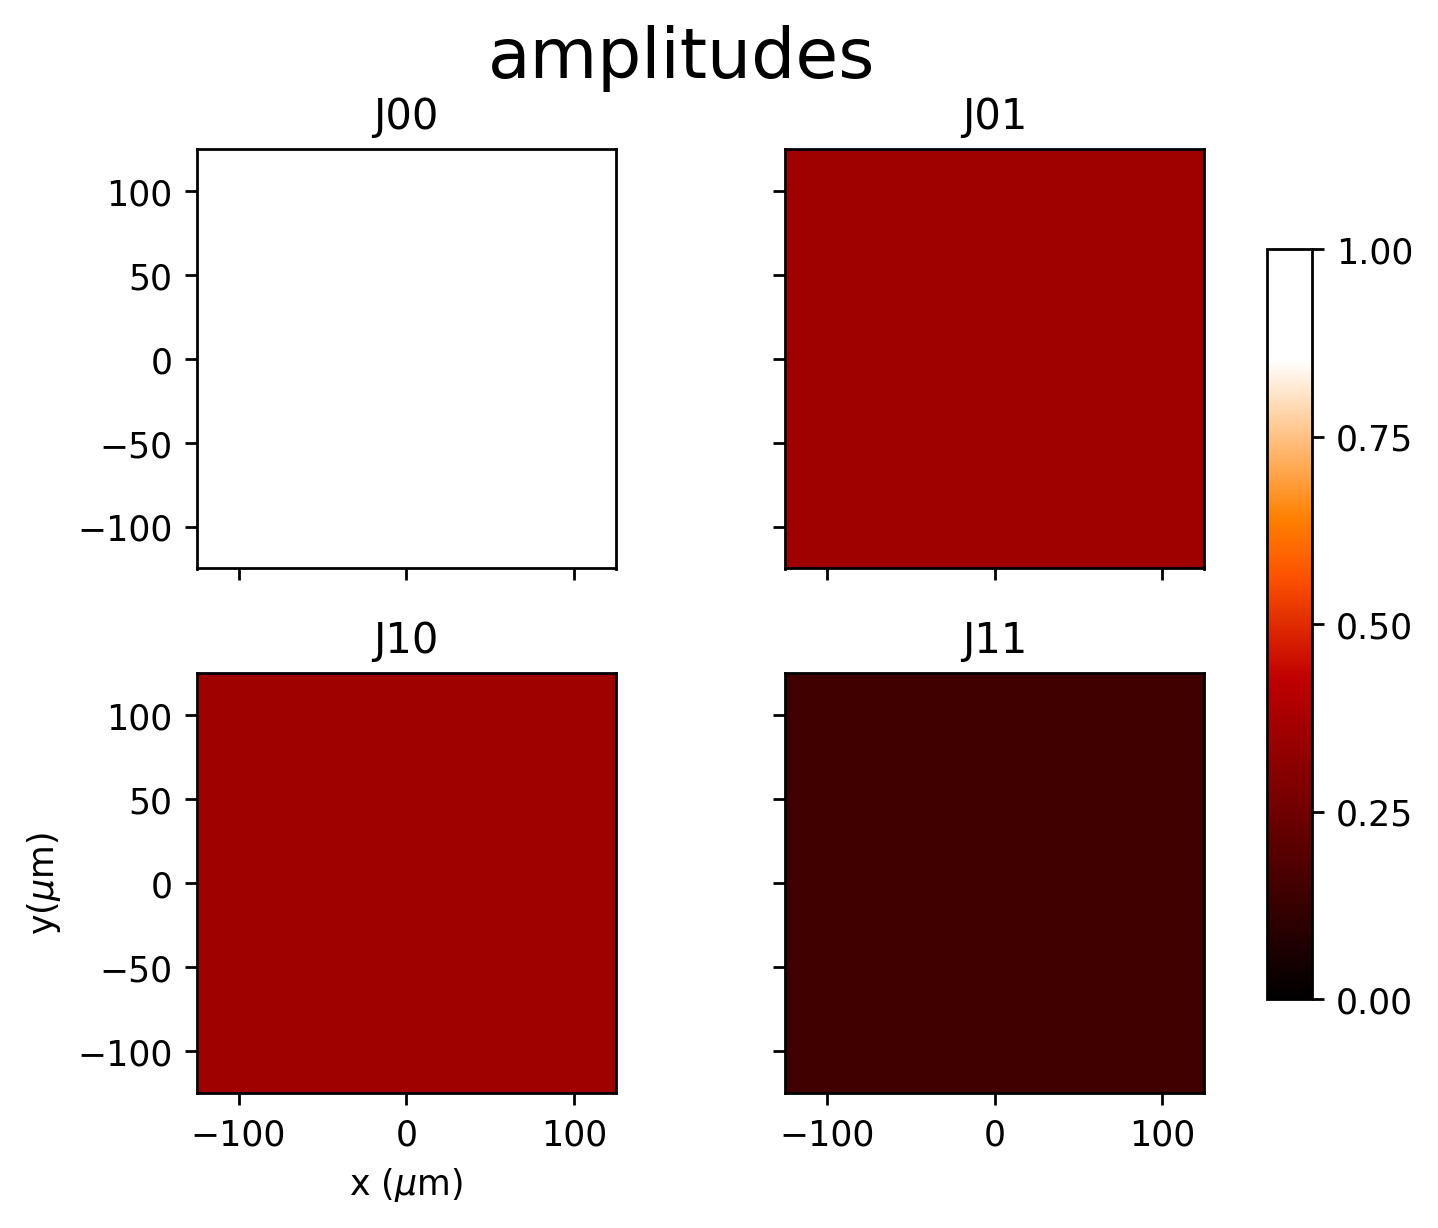

In [6]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


# mask vectorial
vc = Vector_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5*degrees)
vc.draw(kind='amplitude')

### Using py_pol module
If more general polarizer is required, we han use py_pol module

<Figure size 1500x1000 with 0 Axes>

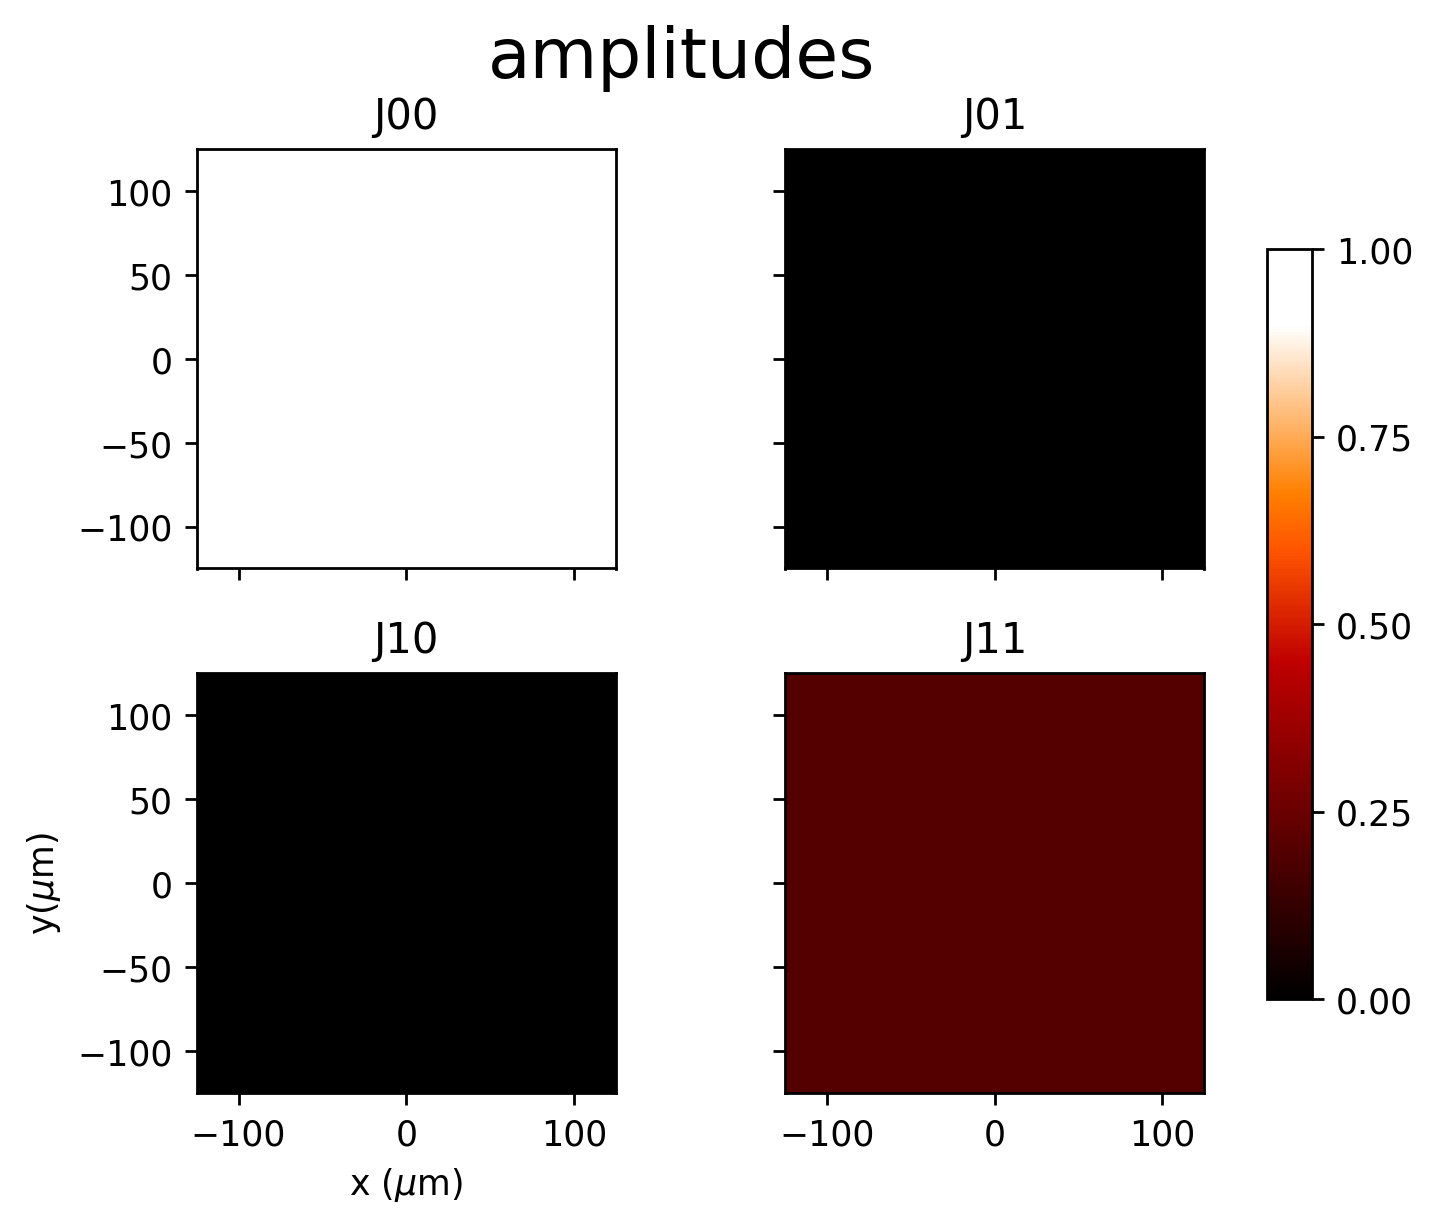

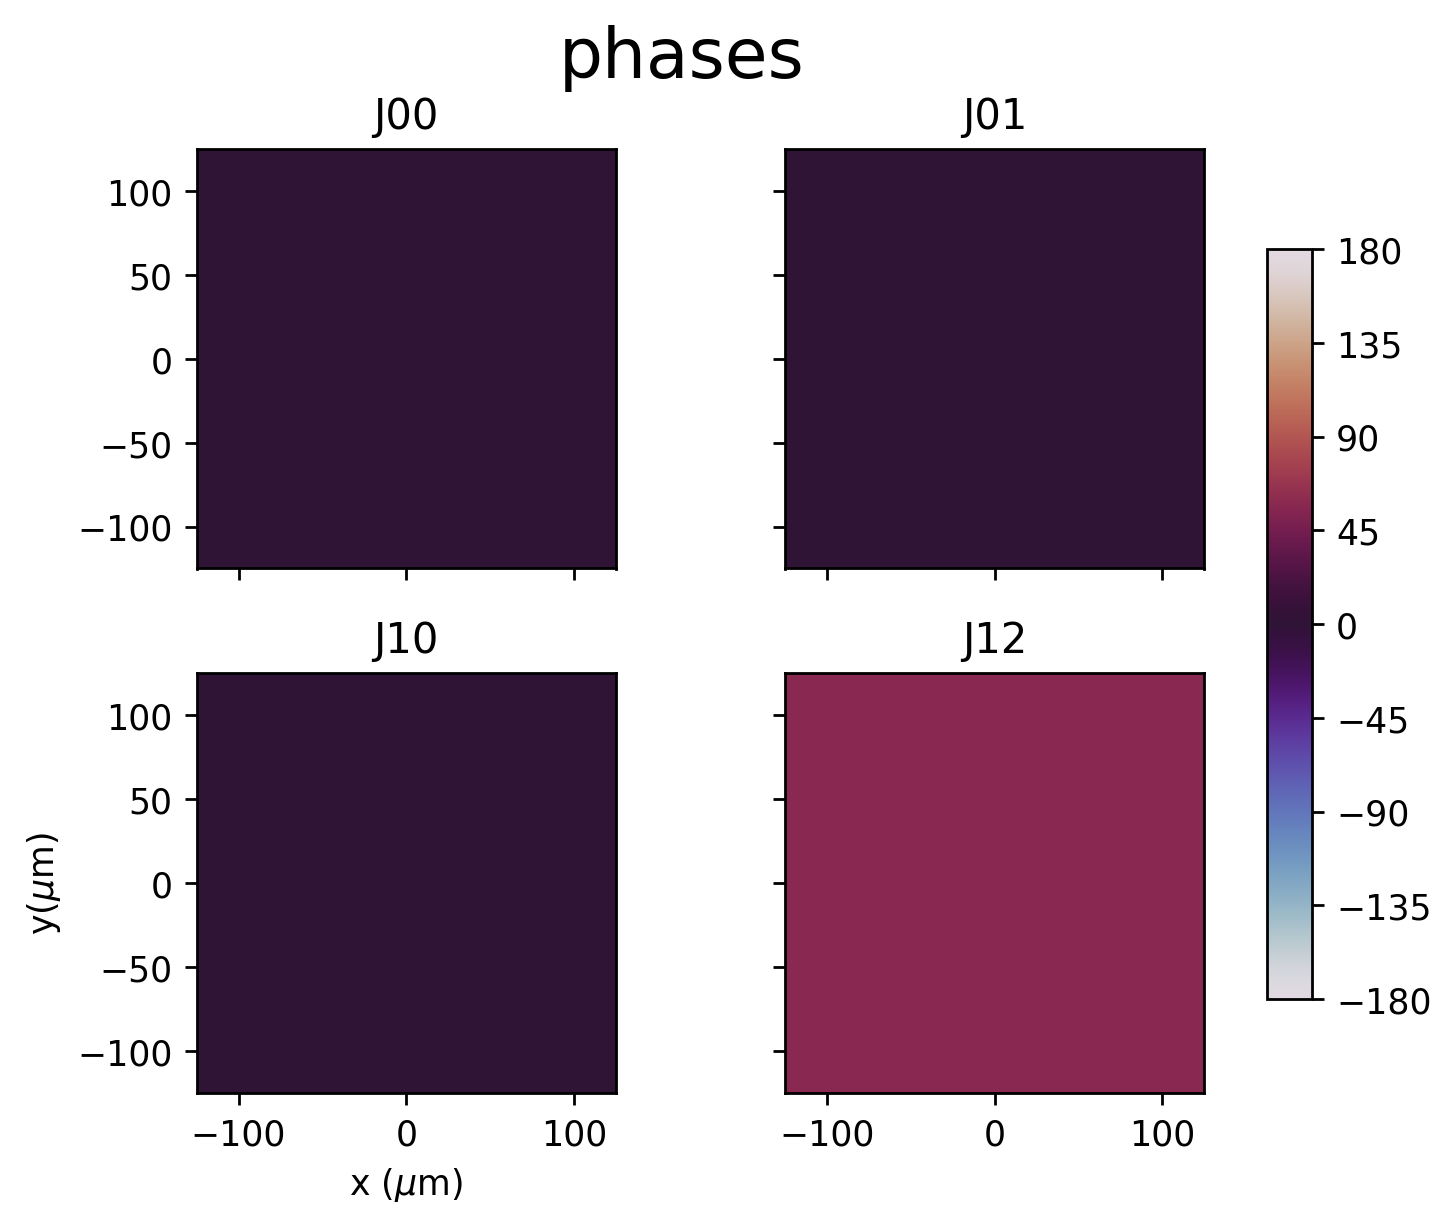

In [7]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


PL = Jones_matrix('m0')
PL.from_components([0.9, 0, 0, 0.2 * np.exp(1j)])

vp = Vector_mask_XY(x0, y0, wavelength)
vp.from_py_pol(PL)

vp.draw(kind='all');

## Apply a mask to the polarizer

<Figure size 1500x1000 with 0 Axes>

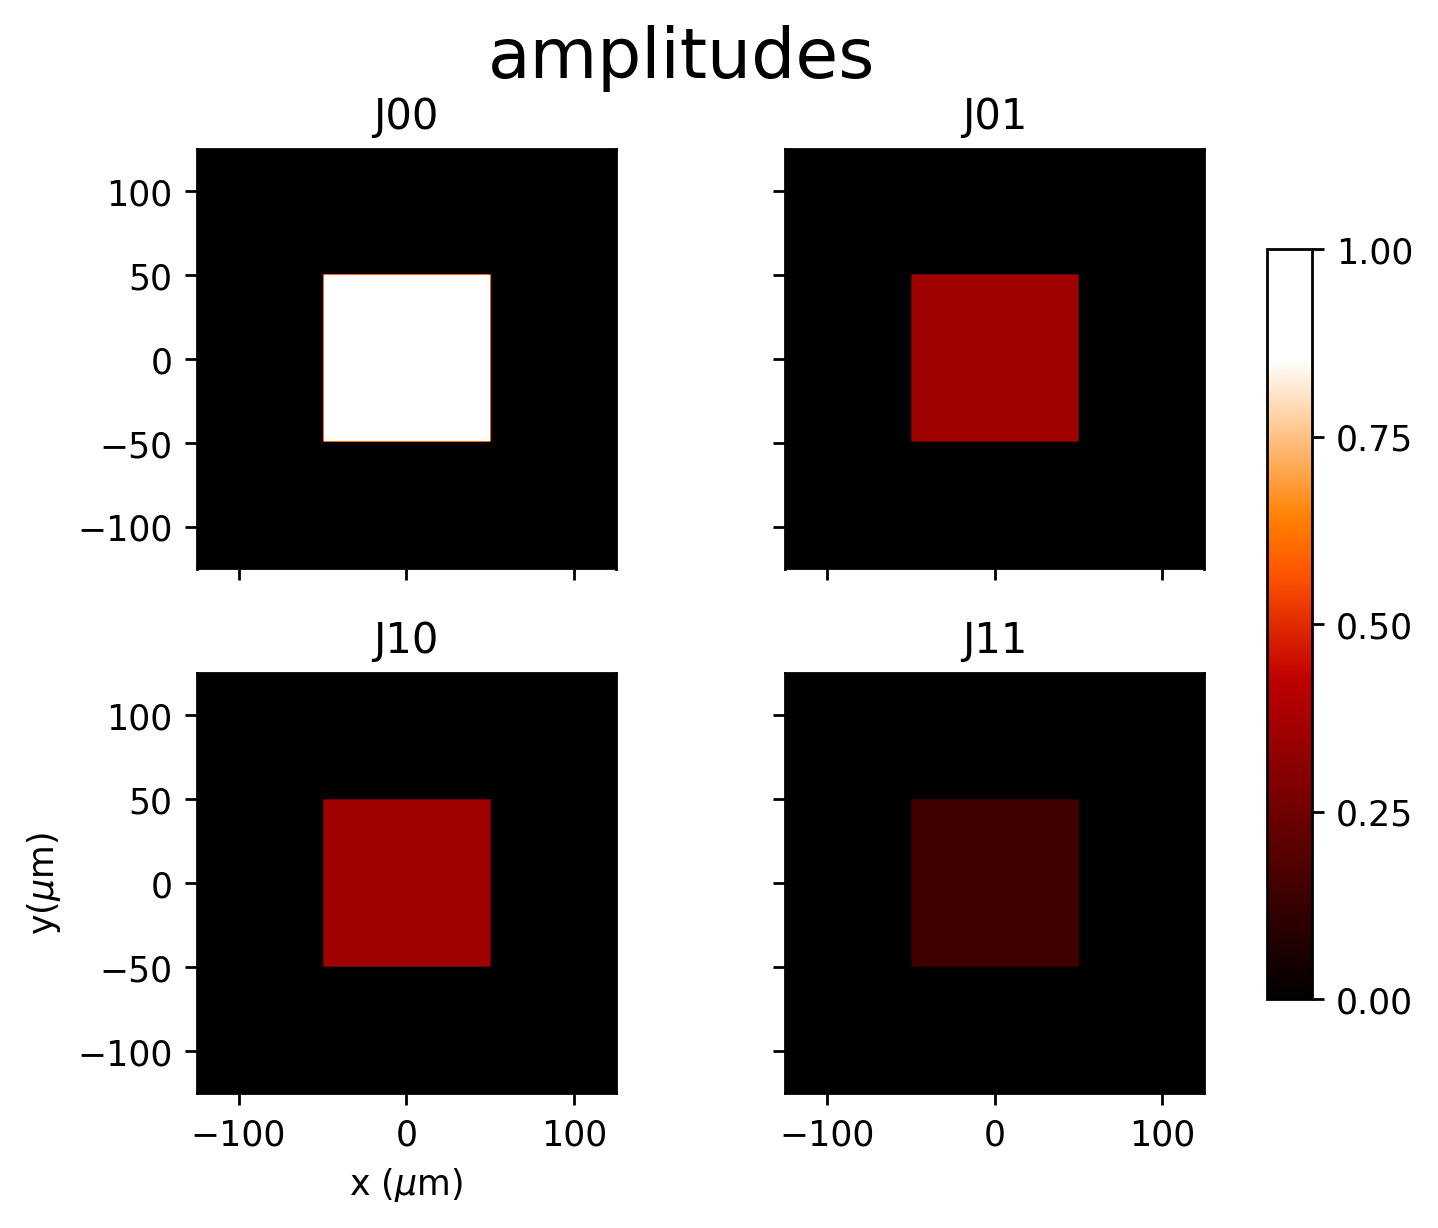

In [8]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.square(
    r0=(0 * um, 0 * um),
    size = (100*um, 100*um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5*degrees)
vc.apply_scalar_mask(u_mask=mask)
vc.draw(kind='amplitude')

## circle

Since normally a circular mask is used, a function for this is defined.
Therefore, an Scalar_XY mask is not required.

<Figure size 1500x1000 with 0 Axes>

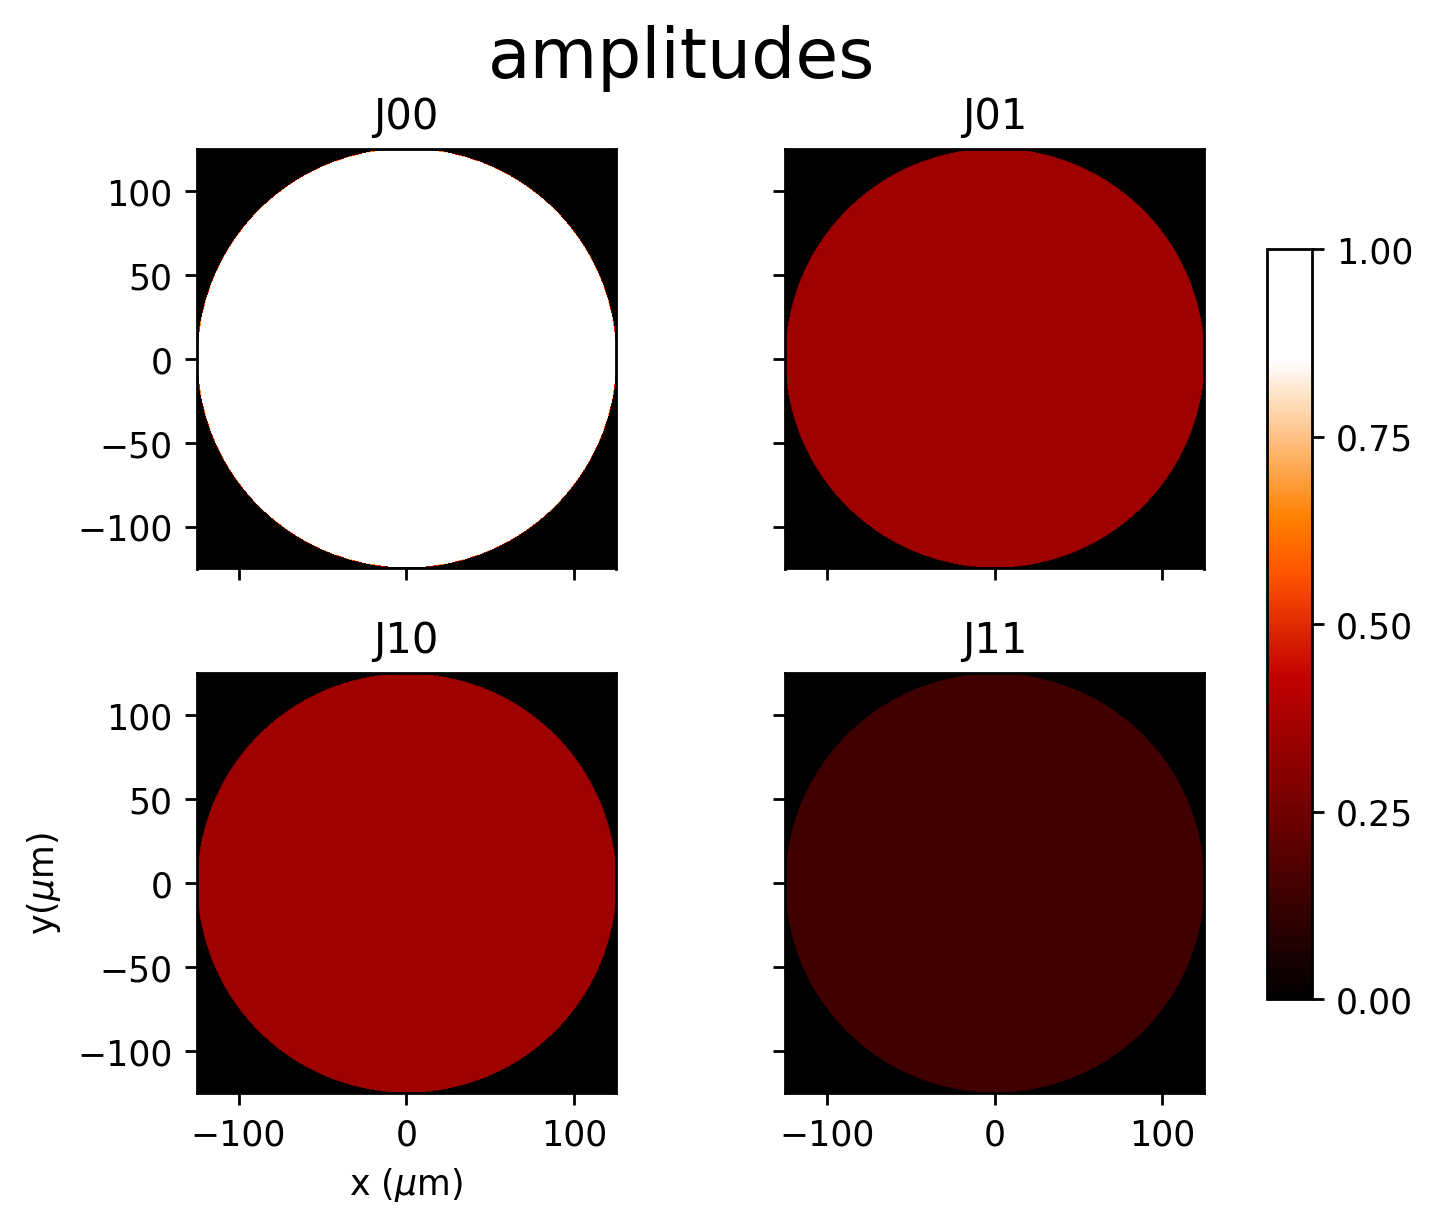

In [9]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

# mask vectorial
vc = Vector_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5*degrees)
vc.apply_circle()
vc.draw(kind='amplitude')

## Complementary mask

When we provide a binary mask, the 1 mask is converted to v1 polarization and 0 mask is converted to v2 polarization.

<Figure size 1500x1000 with 0 Axes>

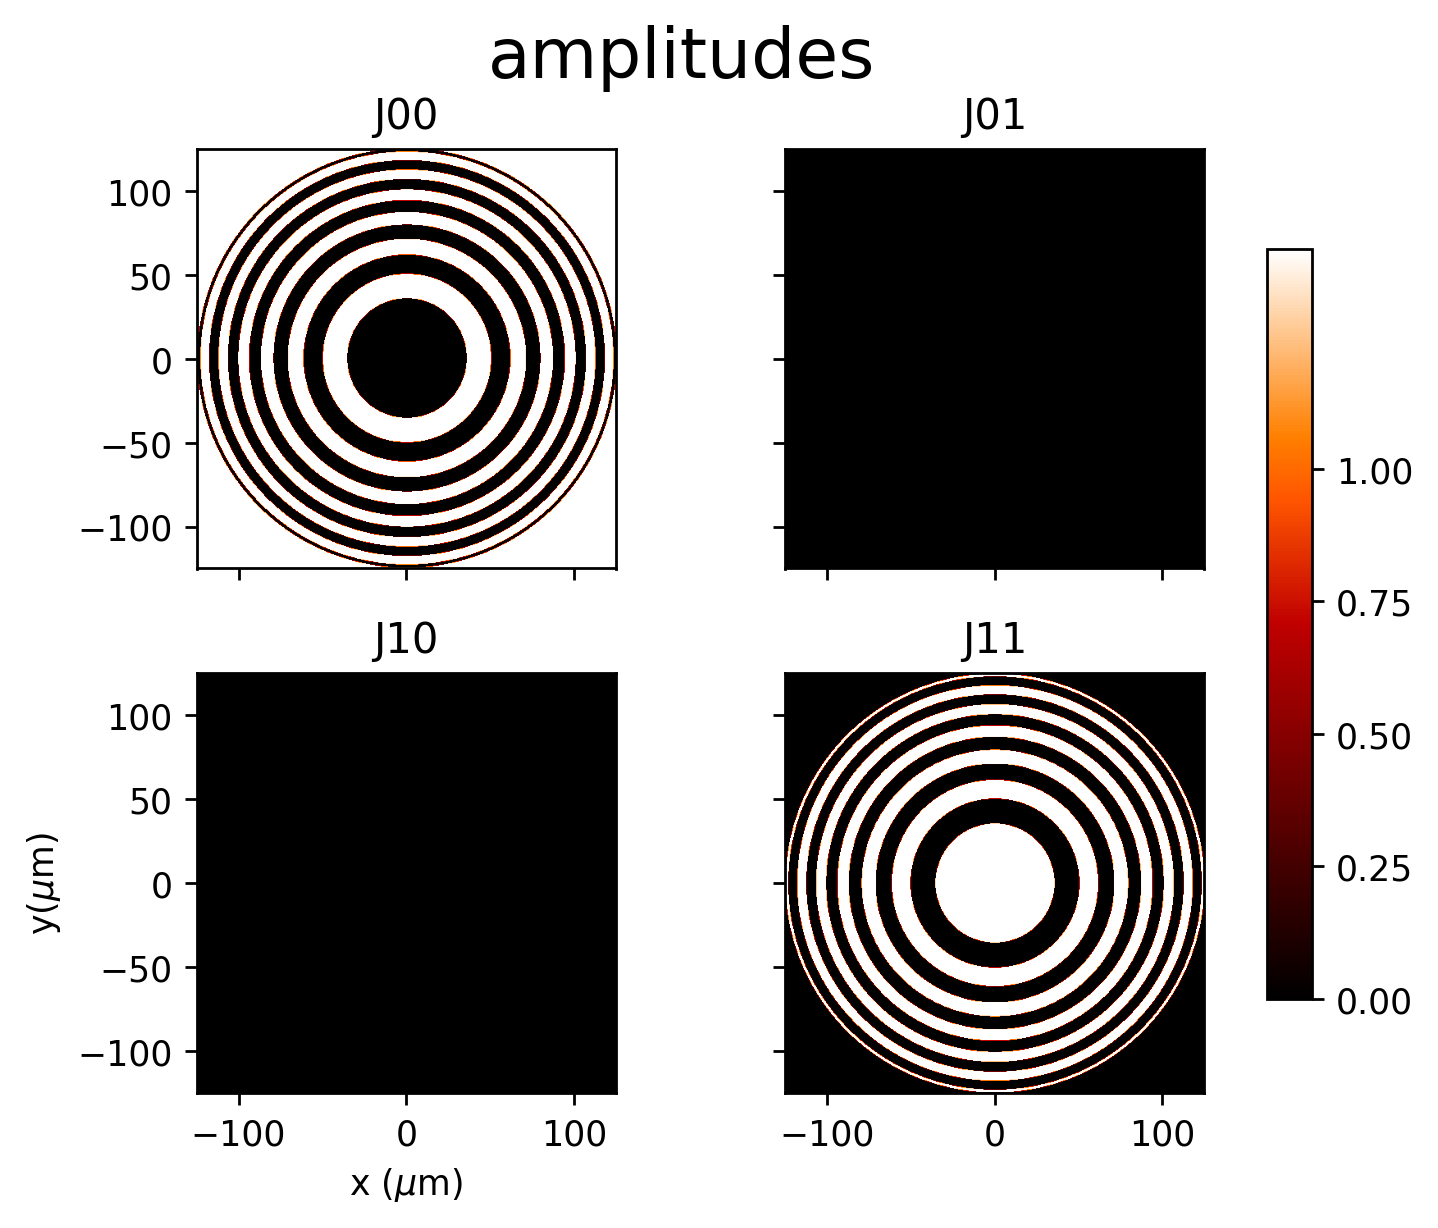

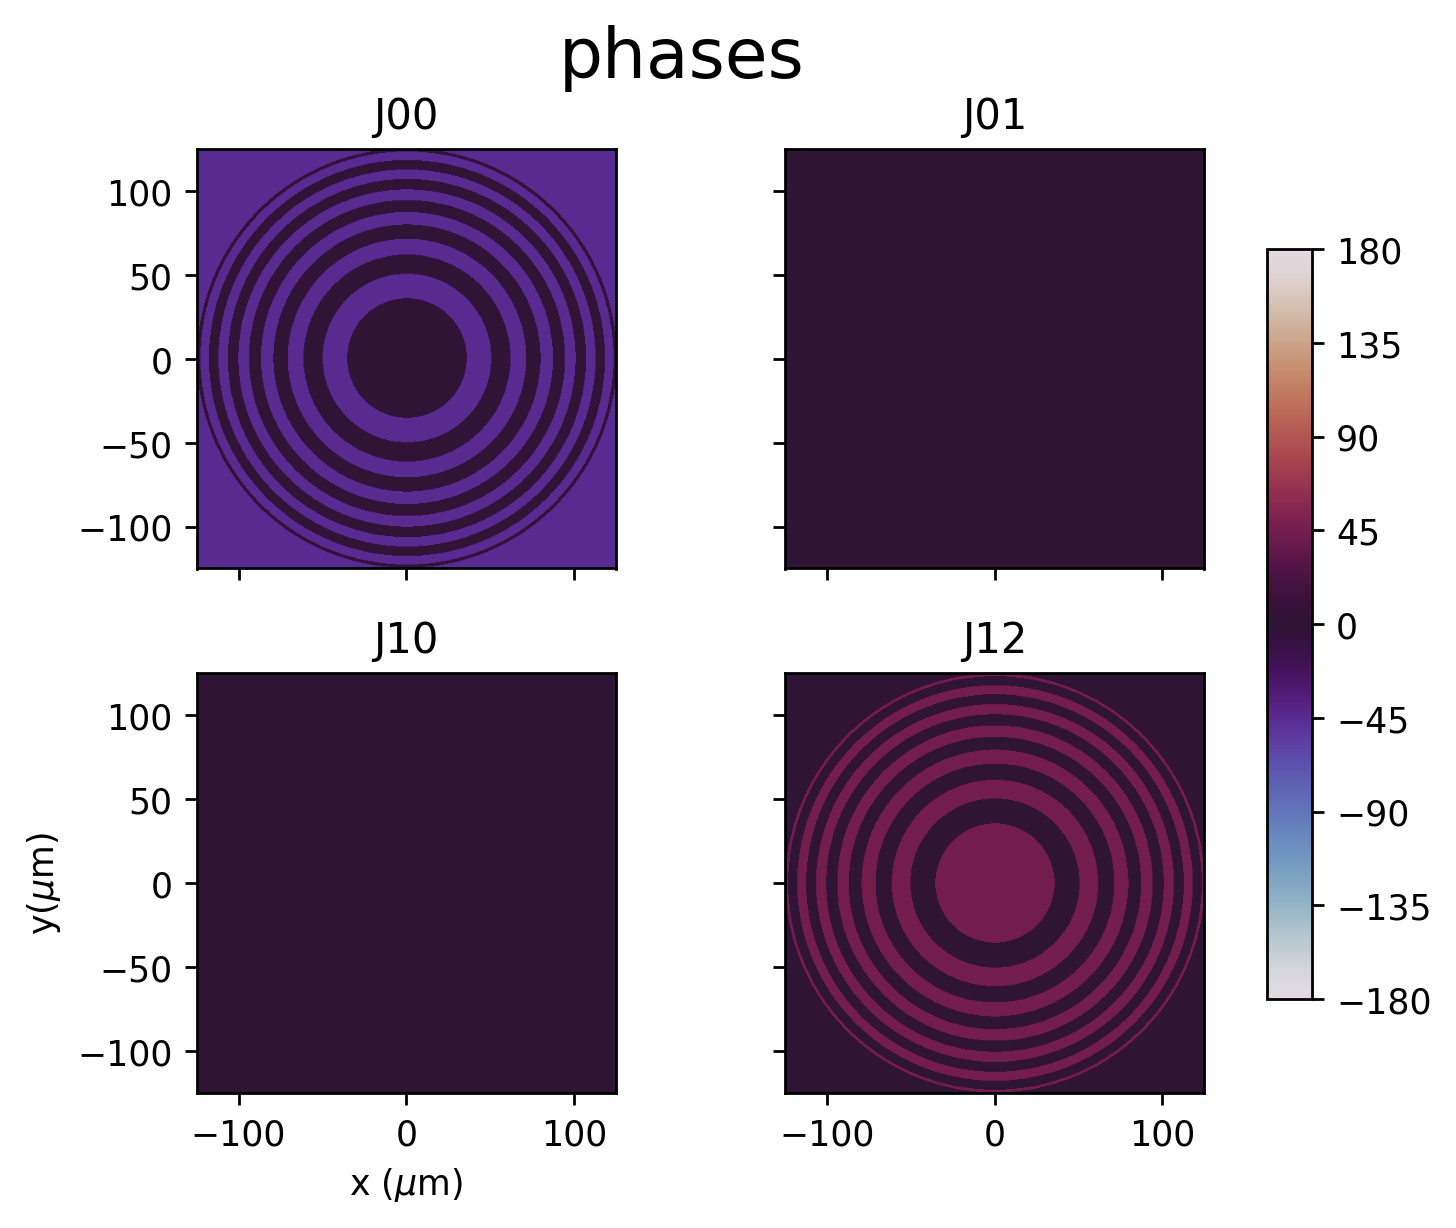

In [10]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(125 * um, 125 * um),
    focal=(2 * mm, 2 * mm),
    angle=0 * degrees,
    kind='amplitude')
mask.pupil()

EM0 = Vector_mask_XY(x0, y0, wavelength)
EM0.complementary_masks(mask=mask,    
                        state_0=np.array([[1-1j, 0], [0, 0]]),
                        state_1=np.array([[0, 0], [0, 1+1j]]))
EM0.draw(kind='all');

## Pass to py_pol

In [11]:
m0 = EM0.to_py_pol()